In [1]:
import os
from dotenv import load_dotenv
import pyodbc
from sqlalchemy import create_engine
import pandas as pd
import tensorflow as tf
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load environment variables
load_dotenv()

# Get credentials from .env
db_server = os.getenv('DB_SERVER')
db_name = os.getenv('DB_NAME')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
# Try this connection string format
connection_string = (
    f"DRIVER={{SQL Server}};"
    f"SERVER={db_server};"
    f"DATABASE={db_name};"
    f"UID={db_user};"
    f"PWD={db_password}"
)

try:
    # First test with pyodbc
    conn = pyodbc.connect(connection_string)
    print("PyODBC Connection successful!")
    
    # If that works, try with SQLAlchemy
    engine = create_engine(f"mssql+pyodbc:///?odbc_connect={connection_string}")
    
    # Test the query
    data_frame = pd.read_sql_query('SELECT * FROM gold.household_power_consumption_at_15_min_interval', engine)
    
except Exception as e:
    print(f"Error: {str(e)}")
data_frame.head()

PyODBC Connection successful!


,date_time,hour,day_of_week,is_weekend,15_lag,avg_global_active_power,avg_global_reactive_power,avg_voltage,avg_global_intensity,dwh_create_date
0,2007-03-29 20:15:00.0000000,20,4,0,2.759866,2.607466,0.236000,238.252666,10.920000,2025-03-27 23:48:16
1,2007-03-29 20:30:00.0000000,20,4,0,2.607466,3.131733,0.244800,235.918666,13.253333,2025-03-27 23:48:16
2,2007-03-29 20:45:00.0000000,20,4,0,3.131733,3.578400,0.328133,235.205333,15.226666,2025-03-27 23:48:16
3,2007-03-29 21:00:00.0000000,21,4,0,3.578400,4.492400,0.295200,236.070000,19.066666,2025-03-27 23:48:16
4,2007-03-29 21:15:00.0000000,21,4,0,4.492400,3.349333,0.139066,236.940000,14.093333,2025-03-27 23:48:16


In [5]:
def run_pipline (dataset, column):
    convert_datetime = dataset[column] = pd.to_datetime(dataset[column])
    return convert_datetime
view_db = run_pipline(data_frame, 'date_time')
data_frame



,date_time,hour,day_of_week,is_weekend,15_lag,avg_global_active_power,avg_global_reactive_power,avg_voltage,avg_global_intensity,dwh_create_date
0,2007-03-29 20:15:00,20,4,0,2.759866,2.607466,0.236000,238.252666,10.920000,2025-03-27 23:48:16
1,2007-03-29 20:30:00,20,4,0,2.607466,3.131733,0.244800,235.918666,13.253333,2025-03-27 23:48:16
2,2007-03-29 20:45:00,20,4,0,3.131733,3.578400,0.328133,235.205333,15.226666,2025-03-27 23:48:16
3,2007-03-29 21:00:00,21,4,0,3.578400,4.492400,0.295200,236.070000,19.066666,2025-03-27 23:48:16
4,2007-03-29 21:15:00,21,4,0,4.492400,3.349333,0.139066,236.940000,14.093333,2025-03-27 23:48:16
...,...,...,...,...,...,...,...,...,...,...
138347,2007-09-14 13:00:00,13,5,0,0.152400,0.245333,0.151466,237.890000,1.280000,2025-03-27 23:48:16
138348,2007-09-14 13:15:00,13,5,0,0.245333,0.295066,0.239200,238.426000,1.586666,2025-03-27 23:48:16
138349,2007-09-14 13:30:00,13,5,0,0.295066,0.206000,0.125733,238.696000,0.933333,2025-03-27 23:48:16
138350,2007-09-14 13:45:00,13,5,0,0.206000,0.224266,0.130533,238.667333,1.040000,2025-03-27 23:48:16


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

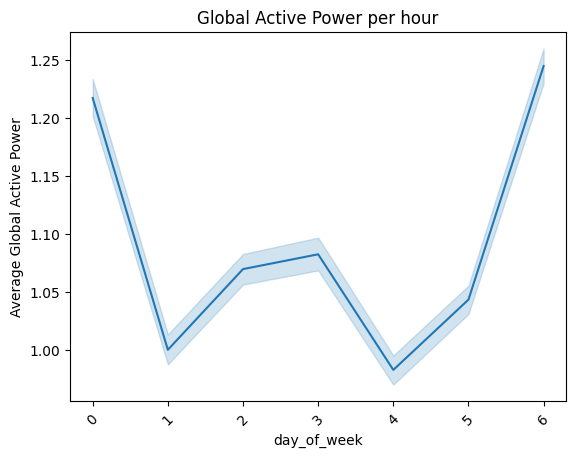

In [14]:
# To plot by actual datetime
sns.lineplot(x='day_of_week', y='avg_global_active_power', data=data_frame)
plt.xlabel("day_of_week")
plt.ylabel("Average Global Active Power")
plt.title("Global Active Power per hour")
plt.xticks(rotation=45)  # Rotate date labels for better readability

def line_plot(dataset, x, y, xlabel, ylable, title, xticks):
    plt.xlabel()
    return sns.lineplot(x = x, y=y, data = dataset)



In [23]:
# Select only numeric columns
numeric_data_frame = data_frame.select_dtypes(include=['float64', 'int64'])


def check_correlation(colums, dataset):
    return dataset.corr()[colums]

check_correlation("avg_global_active_power",numeric_data_frame)


hour                         0.298651
day_of_week                  0.005852
is_weekend                   0.089465
15_lag                       0.843848
avg_global_active_power      1.000000
avg_global_reactive_power    0.264311
avg_voltage                 -0.394269
avg_global_intensity         0.999301
Name: avg_global_active_power, dtype: float64

In [ ]:
target = data_frame["avg_global_active_power"]
features = data_frame.drop(["avg_global_active_power", "dwh_create_date"],axis=1)

target.head()
features.head()


,date_time,avg_global_reactive_power,avg_voltage,avg_global_intensity
0,2010-05-27 12:00:00.0000000,0.196933,239.230666,5.773333
1,2006-12-24 13:45:00.0000000,0.174933,239.255333,9.106666
2,2007-03-29 10:00:00.0000000,0.183600,237.534000,5.946666
3,2007-10-20 11:45:00.0000000,0.224933,242.124666,7.253333
4,2008-05-19 08:00:00.0000000,0.193066,238.991333,5.973333


In [7]:
numeric_features_name = ['avg_global_reactive_power','avg_voltage','avg_global_intensity']
numeric_features = data_frame[numeric_features_name]
numeric_features.head()

tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(138352, 3), dtype=float64, numpy=
array([[1.96933000e-01, 2.39230666e+02, 5.77333300e+00],
       [1.74933000e-01, 2.39255333e+02, 9.10666600e+00],
       [1.83600000e-01, 2.37534000e+02, 5.94666600e+00],
       ...,
       [2.21200000e-01, 2.39159333e+02, 4.37333300e+00],
       [2.37330000e-02, 2.39187333e+02, 1.18533330e+01],
       [1.54133000e-01, 2.41402000e+02, 7.73333300e+00]])>

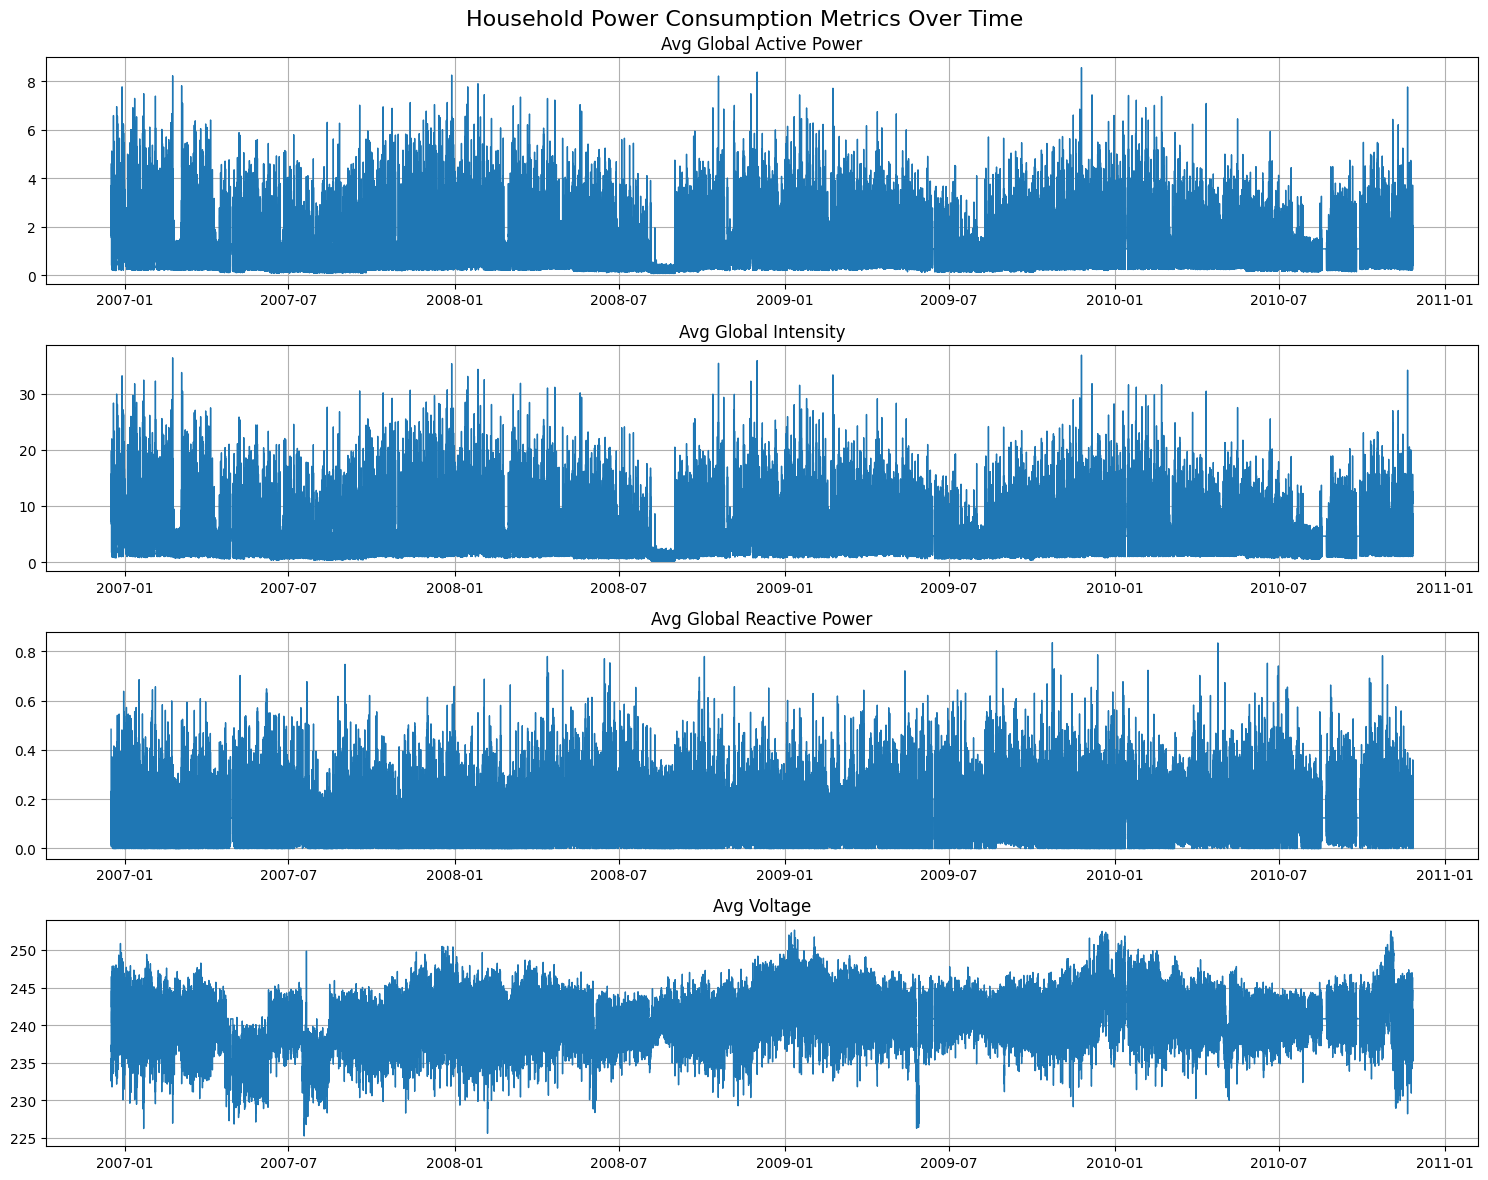

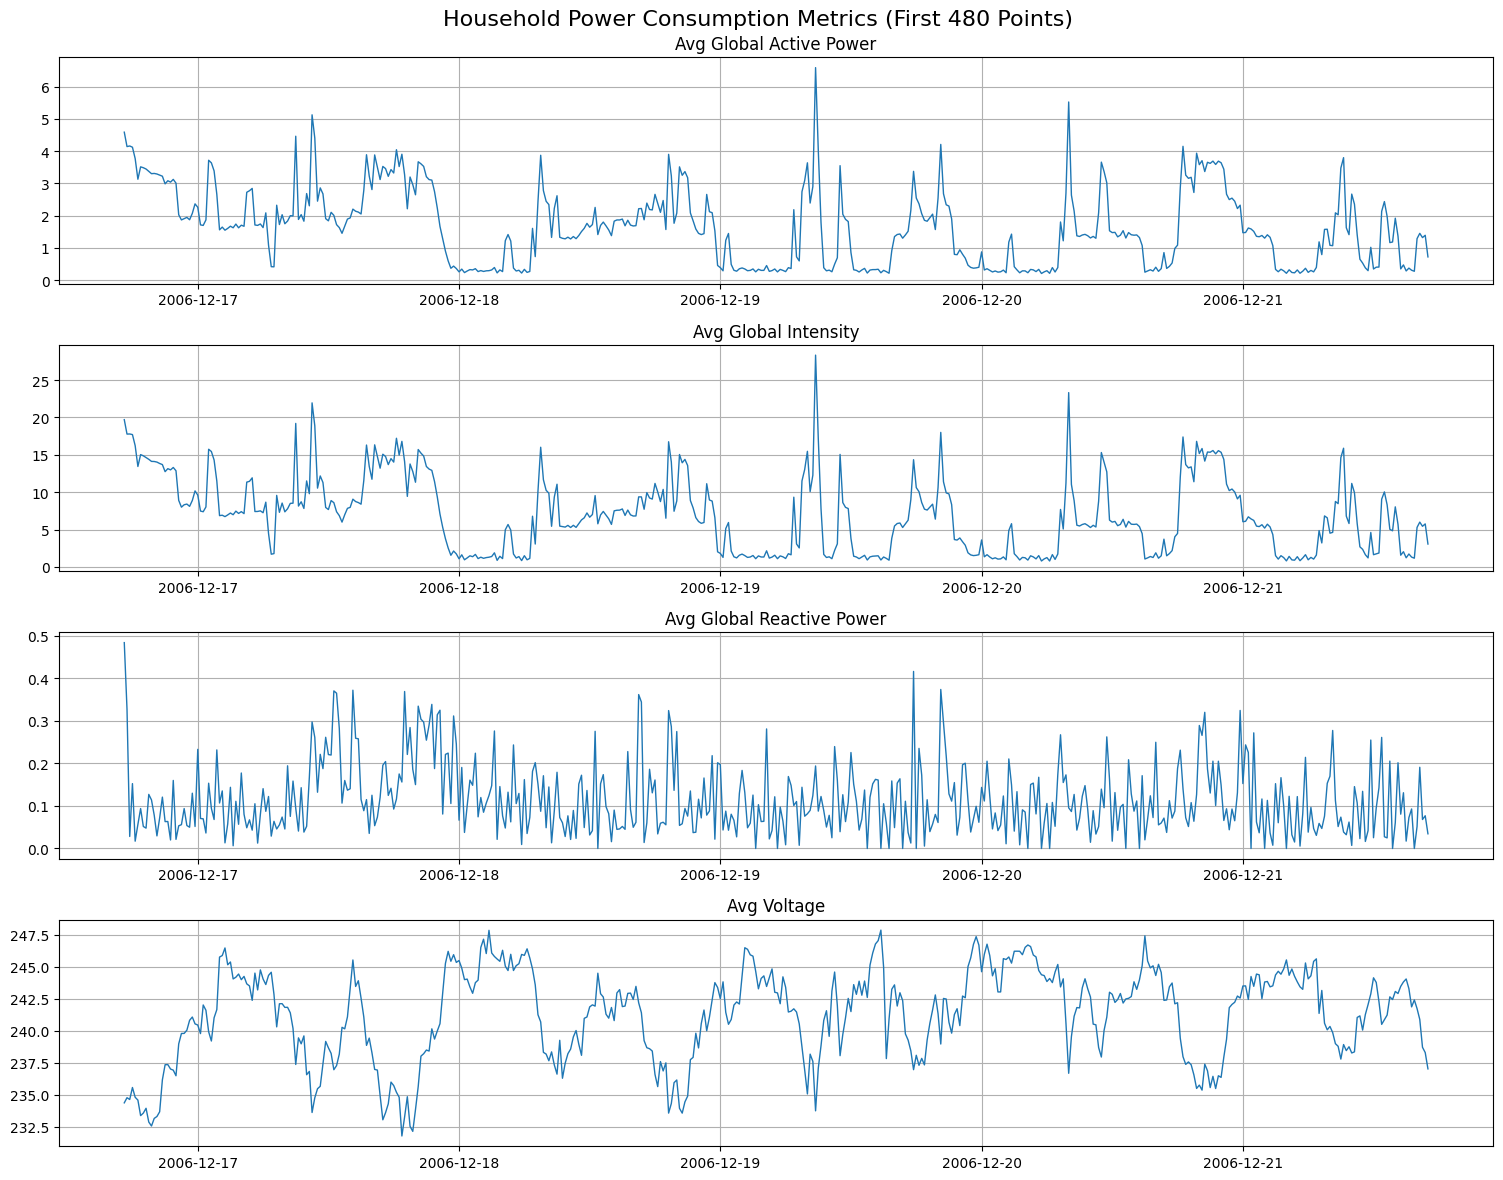

In [31]:
# Sort the data chronologically first
data_frame = data_frame.sort_values('date_time')

# Create the plots with better formatting
plot_cols = ['avg_global_active_power', 'avg_global_intensity', 'avg_global_reactive_power', 'avg_voltage']
plot_features = data_frame[plot_cols]
plot_features.index = data_frame['date_time']

# Create subplots with better formatting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(plot_cols), 1, figsize=(15, 12))
fig.suptitle('Household Power Consumption Metrics Over Time', fontsize=16)

for i, col in enumerate(plot_cols):
    axes[i].plot(plot_features.index, plot_features[col], linewidth=1)
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].grid(True)
    
plt.tight_layout()
plt.show()

# For the 480-point view (showing ~5 days of 15-min intervals)
plot_features = data_frame[plot_cols][:480]
plot_features.index = data_frame['date_time'][:480]

fig, axes = plt.subplots(len(plot_cols), 1, figsize=(15, 12))
fig.suptitle('Household Power Consumption Metrics (First 480 Points)', fontsize=16)

for i, col in enumerate(plot_cols):
    axes[i].plot(plot_features.index, plot_features[col], linewidth=1)
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].grid(True)
    
plt.tight_layout()
plt.show()